<a href="https://colab.research.google.com/github/y-oda2/ml-jhu-hepth/blob/master/random_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

(OLD) Generate random (normal) training and testing data and labels. 
Random NN with 6 layers and 2 outputs  (Jared:  This is too complicated -- just use 1 or 2 layers with large fixed size.)


In [0]:
Nc=16 # Params in the original NN's hidden layer

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
	keras.layers.Dense(Nc, activation='relu'),
	keras.layers.Dense(2, activation='softmax')
	])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

X = np.random.rand(10000,28,28)
y = model.predict(X)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


(OLD) Train and evaluate. Result is ~50% as expected since test data is random? (Jared:  Yeah, you shouldn't actually do any training at all here, just initialize the random network.) 
Generate some more random (normal) data and use the previous NN to predict the labels.  (Jared:  Looks good!  As you say, you do want to feed this into the new smaller model, train it, and see how well it does.)
Define a new smaller NN with only 2 layers, ask to fit the previous data for the same number of epochs. It again reaches ~50% on test set.   (Jared:  Test set is irrelevant here.  What is relevant is that the smaller network improved on the loss on the training set with labels generated by the larger model -- so it's learning to imitate.  The next thing is just to scan over small model sizes in a natural, systematic way and plot )

In [0]:
loss = []

for i in range(Nc):
  print('params in hidden layer:',i)
  model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(i, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
    ])

  model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

  history = model2.fit(X, y, epochs=10,verbose=1)
  loss.append(history.history['loss'][-1])
  keras.backend.clear_session()


params in hidden layer: 0
Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 1s 105us/sample - loss: 0.1346 - acc: 1.0000
Epoch 2/10
10000/10000 [==============================] - 1s 97us/sample - loss: 0.0633 - acc: 1.0000
Epoch 3/10
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0317 - acc: 1.0000
Epoch 4/10
10000/10000 [==============================] - 1s 100us/sample - loss: 0.0172 - acc: 1.0000
Epoch 5/10
10000/10000 [==============================] - 1s 96us/sample - loss: 0.0101 - acc: 1.0000
Epoch 6/10
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0063 - acc: 1.0000
Epoch 7/10
10000/10000 [==============================] - 1s 94us/sample - loss: 0.0042 - acc: 1.0000
Epoch 8/10
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0029 - acc: 1.0000
Epoch 9/10
10000/10000 [==============================] - 1s 96us/sample - loss: 0.0021 - acc: 1.0000
Epoch 10/10
10000/10000 [======

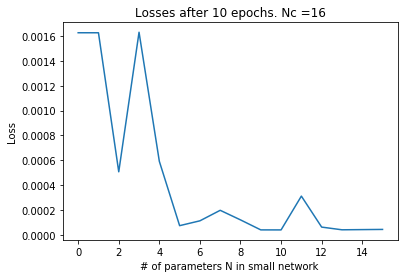

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(Nc),loss)
plt.title('Losses after 10 epochs. Nc ='+str(Nc))
plt.xlabel('# of parameters N in small network ')
plt.ylabel('Loss')
plt.show()